# <font color =   #0000cc> <i> Clase 9 Programación I MCD 

## <font color= #0000FF> <i> WEB Scraping

In [1]:
# Video intro a Web Scraping https://www.youtube.com/watch?v=kPNHKrOqedI

import requests     #instalar desde el prompt con pip install requests

# Beautifulsoup es un librería que permite analizar y recorrer la información de un archivo que contiene etiquetas,
# las cuales forman un árbol
from bs4 import BeautifulSoup #instalar desde el prompt con pip install bs4, con la misma instrucción en la terminal se verifica si está inslada

import lxml        #instalar desde el prompt con pip install lxml
import texttable as tt     #instalar desde el prompt con pip install texttable

In [2]:
# URL para extraer datos
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
  
# accedemos al URL 
page = requests.get(url)

#Le indicamos que el texto del objeto "page" es de tipo html
soup = BeautifulSoup(page.text, 'html.parser')

#Creamos una lista vacía para almacenar los datos
data = []

#print(soup.prettify)
  
# soup.find_all('td') traerá cada 
# elemento en la tabla de la URL que se encuentren entre un tag "td"
# que son los que se usan para crear tablas en HTML

# data_iterator es el iterador de la tabla
data_iterator = iter(soup.find_all('td')) 
  

# Este ciclo seguirá repitiéndose hasta que haya
# datos disponibles en el iterador
while True:
    try:
        pais = next(data_iterator).text
        casos_confirmados = next(data_iterator).text
        muertes = next(data_iterator).text
        region = next(data_iterator).text
  
        data.append((
            pais,
            int(casos_confirmados.replace(',', '')),
            int(muertes.replace(',', '')),
            region
        ))
  
    # El error StopIteration se genera cuando
    # no quedan más elementos para
    # iterar
    except StopIteration:
        break
        
        
data        


[('United States', 111820082, 1219487, 'North America'),
 ('India', 45035393, 533570, 'Asia'),
 ('France', 40138560, 167642, 'Europe'),
 ('Germany', 38828995, 183027, 'Europe'),
 ('Brazil', 38743918, 711380, 'South America'),
 ('South Korea', 34571873, 35934, 'Asia'),
 ('Japan (+Diamond Princess)', 33804284, 74707, 'Asia'),
 ('Italy', 26723249, 196487, 'Europe'),
 ('United Kingdom', 24910387, 232112, 'Europe'),
 ('Russia', 24124215, 402756, 'Europe'),
 ('Turkey', 17232066, 102174, 'Asia'),
 ('Spain', 13914811, 121760, 'Europe'),
 ('Australia', 11853144, 24414, 'Australia/Oceania'),
 ('Vietnam', 11625195, 43206, 'Asia'),
 ('Taiwan', 10241523, 19005, 'Asia'),
 ('Argentina', 10128845, 130841, 'South America'),
 ('Netherlands', 8635786, 22992, 'Europe'),
 ('Mexico', 7702809, 334958, 'North America'),
 ('Iran', 7627186, 146811, 'Asia'),
 ('Indonesia', 6829221, 162063, 'Asia'),
 ('Poland', 6661991, 120598, 'Europe'),
 ('Colombia', 6400173, 143200, 'South America'),
 ('Greece', 6101379, 37869

In [3]:
type(data)

list

In [4]:
# Ordenar las tuplas con base en el valor de una posición en específico (número de muertes).

#list.sort(key=..., reverse=...) Endonde key es el criterio que va a buscar para llevar a cabo el ordenamiento


data2=data

def mi_funcion(x):   #Con esta función obtenemos los elementos que queremos ordenar
     return x[2]     #x es la lista de tuplas data2 coluna de muertes.
    
data2.sort(key=mi_funcion, reverse=True)  #data.sort es la función list.sort True descendente.

data2


[('United States', 111820082, 1219487, 'North America'),
 ('Brazil', 38743918, 711380, 'South America'),
 ('India', 45035393, 533570, 'Asia'),
 ('Russia', 24124215, 402756, 'Europe'),
 ('Mexico', 7702809, 334958, 'North America'),
 ('United Kingdom', 24910387, 232112, 'Europe'),
 ('Peru', 4572667, 222161, 'South America'),
 ('Italy', 26723249, 196487, 'Europe'),
 ('Germany', 38828995, 183027, 'Europe'),
 ('France', 40138560, 167642, 'Europe'),
 ('Indonesia', 6829221, 162063, 'Asia'),
 ('Iran', 7627186, 146811, 'Asia'),
 ('Colombia', 6400173, 143200, 'South America'),
 ('Argentina', 10128845, 130841, 'South America'),
 ('Spain', 13914811, 121760, 'Europe'),
 ('Poland', 6661991, 120598, 'Europe'),
 ('Ukraine', 5557995, 112418, 'Europe'),
 ('South Africa', 4076463, 102595, 'Africa'),
 ('Turkey', 17232066, 102174, 'Asia'),
 ('Japan (+Diamond Princess)', 33804284, 74707, 'Asia'),
 ('Romania', 3529735, 68929, 'Europe'),
 ('Philippines', 4140383, 66864, 'Asia'),
 ('Chile', 5384853, 64497, 'So

In [ ]:
# Ordenar los datos por el número de muertes x arg de entrada y x[2] el índice de ordenamiento.
data.sort(key = lambda x: x[2], reverse = True) 

#lambda x: x[1] sustituye a "mi_funcion"     
data

[('United States', 111820082, 1219487, 'North America'),
 ('Brazil', 38743918, 711380, 'South America'),
 ('India', 45035393, 533570, 'Asia'),
 ('Russia', 24124215, 402756, 'Europe'),
 ('Mexico', 7702809, 334958, 'North America'),
 ('United Kingdom', 24910387, 232112, 'Europe'),
 ('Peru', 4572667, 222161, 'South America'),
 ('Italy', 26723249, 196487, 'Europe'),
 ('Germany', 38828995, 183027, 'Europe'),
 ('France', 40138560, 167642, 'Europe'),
 ('Indonesia', 6829221, 162063, 'Asia'),
 ('Iran', 7627186, 146811, 'Asia'),
 ('Colombia', 6400173, 143200, 'South America'),
 ('Argentina', 10128845, 130841, 'South America'),
 ('Spain', 13914811, 121760, 'Europe'),
 ('Poland', 6661991, 120598, 'Europe'),
 ('Ukraine', 5557995, 112418, 'Europe'),
 ('South Africa', 4076463, 102595, 'Africa'),
 ('Turkey', 17232066, 102174, 'Asia'),
 ('Japan (+Diamond Princess)', 33804284, 74707, 'Asia'),
 ('Romania', 3529735, 68929, 'Europe'),
 ('Philippines', 4140383, 66864, 'Asia'),
 ('Chile', 5384853, 64497, 'So

Ordenando ascendentemente la lista de tuplas (lista ordenada) con ciclos for

In [9]:
# Variación del algoritmo de ordenamiento de burbuja (bubble sort): Ordenando de mayor a menor
# https://www.youtube.com/watch?v=TeerSd_ZqJQ 

campo_a_ordenar = 0              # Índice de la columna a ordenar por País

cant_tuplas = len(data)         # Calcula la cantidad de tuplas en la lista data y lo asigna en la variable
print(cant_tuplas) #230

for i in range(0, cant_tuplas):   #0,1,2,3,4.... Recorre desde el primer hasta el penúltimo índice
    for j in range(0, cant_tuplas-i-1):       #229, 228,227..... Recorre desde el primer hasta el penúltimo índice que falta por ordenar
        if (data[j][campo_a_ordenar] > data[j + 1][campo_a_ordenar]):  #Si la tupla 229 es mayor que la tupla 228 intercambia los valores 
            temp = data[j]        #Guarda temporalmente la tupla 229 Brazil 
            data[j]= data[j + 1]  #Copia la 229 a la posicion 228 United States
            data[j + 1]= temp     #Y la 228 la coloca en la posicion 229, dejó a la menor antes de la mayor
  
data

230
Cada ejecución:  0


[('Afghanistan', 234174, 7996, 'Asia'),
 ('Albania', 334863, 3605, 'Europe'),
 ('Algeria', 272010, 6881, 'Africa'),
 ('Andorra', 48015, 165, 'Europe'),
 ('Angola', 107327, 1937, 'Africa'),
 ('Anguilla', 3904, 12, 'North America'),
 ('Antigua and Barbuda', 9106, 146, 'North America'),
 ('Argentina', 10128845, 130841, 'South America'),
 ('Armenia', 451831, 8777, 'Asia'),
 ('Aruba', 44224, 292, 'North America'),
 ('Australia', 11853144, 24414, 'Australia/Oceania'),
 ('Austria', 6081287, 22542, 'Europe'),
 ('Azerbaijan', 835234, 10400, 'Asia'),
 ('Bahamas', 38084, 844, 'North America'),
 ('Bahrain', 729549, 1574, 'Asia'),
 ('Bangladesh', 2049377, 29493, 'Asia'),
 ('Barbados', 110578, 648, 'North America'),
 ('Belarus', 994037, 7118, 'Europe'),
 ('Belgium', 4861695, 34376, 'Europe'),
 ('Belize', 71409, 688, 'North America'),
 ('Benin', 28036, 163, 'Africa'),
 ('Bermuda', 18860, 165, 'North America'),
 ('Bhutan', 62697, 21, 'Asia'),
 ('Bolivia', 1212131, 22407, 'South America'),
 ('Bosnia an

<b> <i> <font color=  #FF6600 > Ejercicio 1

 Cambia el código del ordenamiento ascendente para que este lleve a cabo un ordenamiento descendente

## <font color= #0000FF> <i> Ejemplos de Ciclos Anidados

Encontrando números repetidos en una lista

<b> <i> <font color= #0000BB> Ejemplo 1 de Ciclos Anidados

Utilizando ciclos for anidados

In [11]:
num=[4, 7, 8, 9, 2, 4, 2, 9]

num_rep=[]

for i in range(len(num)):
    for j in range(len(num)): 
        if i != j: 
            if num[i] == num[j] and num[i] not in num_rep:
                num_rep.append(num[i])
                
num_rep

[4, 9, 2]

Utilizando el método count de las listas

In [12]:
dir(list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [9]:
num.count(9)

2

In [10]:
num.count(1)

1

<b> <i> <font color=  #FF6600 > Ejercicio 2

Crea una lista que contenga los números repetidos en el objeto "num" utilizando count()

<b> <i> <font color= #0000BB> Ejemplo 2 de Ciclos Anidados

Encuentra las posibles combinaciones de blusas y pantalones como las de el ejemplo que se muestra en la figura            

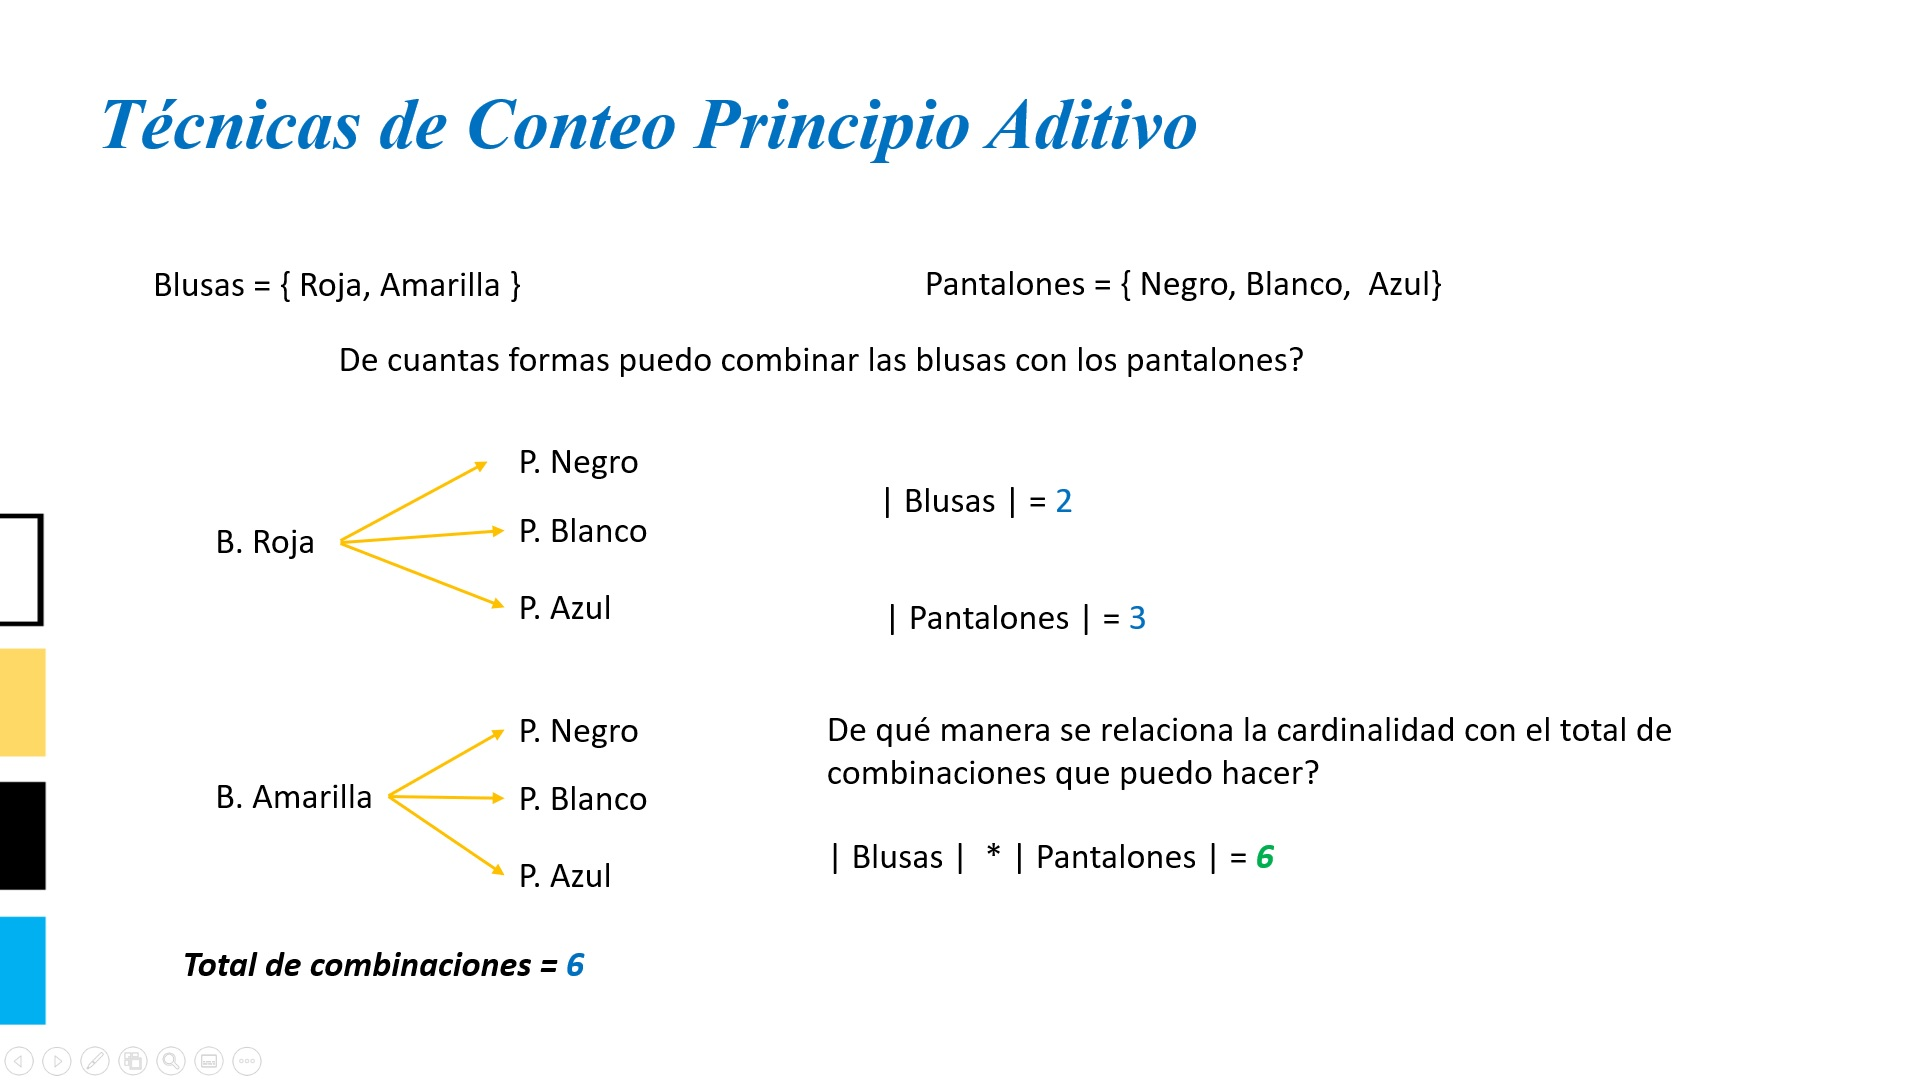

In [11]:
from IPython.display import Image
Image("pares.jpg", width=500,height=500)

In [12]:
blusas = ["Blusa Roja", "Blusa Amarilla"]

pantalones = ["Pantalon Negro", "Pantalon Blanco", "Pantalon Azul"]

combinaciones = []

for i in range(len(blusas)): 
    for j in range(len(pantalones)):
        combinaciones.append((blusas[i],pantalones[j]))

combinaciones

[('Blusa Roja', 'Pantalon Negro'),
 ('Blusa Roja', 'Pantalon Blanco'),
 ('Blusa Roja', 'Pantalon Azul'),
 ('Blusa Amarilla', 'Pantalon Negro'),
 ('Blusa Amarilla', 'Pantalon Blanco'),
 ('Blusa Amarilla', 'Pantalon Azul')]

## <font color= #0000FF> <i> Listas de Comprensión con Ciclos Anidados

Permiten crear listas en una sola línea

<b> [(Lista a crear) for iterable]
    
<b> [(Lista a crear) for iterable if condicion]

<b> <i> <font color= #0000BB> Ejemplo 1 de Listas de Comprensión con Ciclos Anidados
    
  

Sin Lista de Comprensión

In [13]:
lista_pares = []

for i in range(1, 3): # (start, stop, step) * stop not included.
    for j in range(1, 5): 
        lista_pares.append((i, j))
        
lista_pares

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4)]

Con Lista de Comprensión


In [14]:
lista_pares2 = [(i, j) for i in range(1,3) for j in range(1, 5)]
lista_pares2

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4)]

<b> <i> <font color=  #FF6600 > Ejercicio 3

Obtén las combinaciones de blusas y pantalones utilizando listas de comprensión

## <font color= #0000FF> <i> Interfaces Gráficas

Una interfaz gráfica nos ayuda a interactuar con el usuario y, una vez habiendo obtenido la información que este nos proporciona, llevar a cabo una tarea

Cuando creamos una interfaz ponemos en práctica lo que aprendimos acerca de las clases y los objetos

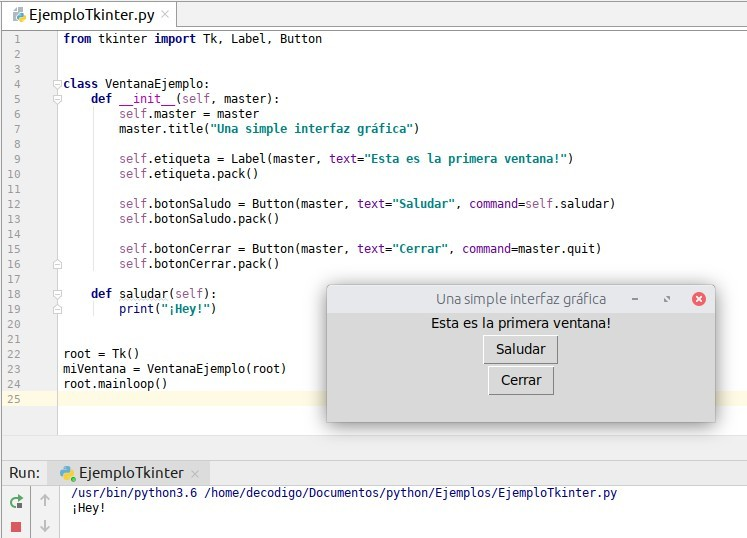

In [15]:
from IPython.display import Image
Image("python3_tkinter.jpg", width=500,height=500)

Imágen tomada de: Hernández, Jesús & Jimenez, Andres & Porras, Hernán. (2016). DESARROLLO DE APLICACIONES EN PYTHON PARA EL APRENDIZAJE DE FÍSICA COMPUTACIONAL (Development of Python applications for learning computational physics). Ingeniería Investigación y Desarrollo. 16. 72. 10.19053/1900771X.5122.

### <font color= #33691e> <i> Librería Tkinter

Basada en una librería multiplataforma de código abierto llamada TK

Para ver si tenemos instalada la librería tkinter podemos teclear en el prompt de Anaconda 

<b> python -m tkinter
    
Si no muestra ningún error, significa que ya está instalada
    
En caso de que no la tengas instalada, habría que probar a instalar desde el prompt de Anaconda con: 
        
conda install -c anaconda tk 

Consultar la página web https://anaconda.org/anaconda/tk

#### <b> <font color= #990000 > <i> Widgets en Tkinter

Los widgets son los componentes gráficos de las interfaces

Estos deben de seguir una jerarquía a la hora de añadirse a la interfaz de la que forman parte

Por ejemplo, un marco o frame, forma parte del objeto raiz llamada Tk, y a su vez, un botón es parte de un marco

Algunos de los widgets que existen en Tkinter son: 


<b> <i>  <font color= #990000 >Nota: Copiar estos códigos en Sublime Text y correrlos en el prompt de Anaconda

##### <b> <font color=  #6600CC > <i> Tk

Es el contenedor base de todos los widgets que forman la interfaz

Si queremo colocarle un logotipo, necesitamos convertir una imágen a extensión .ico, hay muchos sitios en internet que lo hacen. 

Un sitio es: https://onlineconvertfree.com/es/complete/jpg-ico/


##### <b> <font color=  #6600CC > <i> Frame o Marco

Contenedor de otros widgets

Puede tener cualquier tamaño y posicionarse ya sea en la raiz o dentro de otro marco

##### <b> <font color=  #6600CC > <i> Etiquetas e Imágenes

Se tratan de la misma manera

<b> <i> <font color=  #FF6600 > Ejercicio 4

Crea una interfaz gráfica que tenga las siguientes características: 

1.- Tamaño ajustable horizontalmente 
2.- Que contenga un ícono
3.- Título: "Interfaz Clase Programación"
4.- Que contenga un marco con borde de 3 pixeles y color de fondo amarillo
5.- En la raiz habrá una imágen de tipo jpg en la esquina superior izquierda
6.- Dentro del marco incluye una leyenda 
7.- El cursor dentro del marco se debe mostrar con un pirata y fuera del mismo, con un círculo

##### <b> <font color=  #6600CC > <i> Entry

Campo corto de entrada de datos, ya sea texto o números 

En lugar de pack vamos a utilizar grid para acomodarlos de una manera más ordenada

##### <b> <font color=  #6600CC > <i> Text

Campo de texto multilínea para escribir textos largos como si fuera un notepad

##### <b> <font color=  #6600CC > <i> Botones

Botón sobre el cuál el usuario puede hacer clic

## <font color= #0000FF> <i> Tarea

Subir al classroom los cuatro ejercicios que hicieron durante la clase